# Pima Indian Diabetes Classification using KNN Algorithm

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset.

In [1]:
# import all the data manipulation and visualization packages
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Standardize the data

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
scaler = StandardScaler()

In [6]:
scaler.fit(df.drop('Outcome',axis= 1))

StandardScaler()

In [8]:
scaler_transform = scaler.transform(df.drop('Outcome',axis=1))

In [9]:
new_df = pd.DataFrame(scaler_transform , columns=df.columns[:-1])

In [10]:
new_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496


#### Lets split the data into Train and Test

In [11]:
X = new_df
y = df['Outcome']

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

### Lets train the model 

In [14]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
knn = KNeighborsClassifier(n_neighbors=1) 

In [16]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [17]:
prediction = knn.predict(X_test)

Lets now evaluate the model and calculate its accuracy

In [18]:
from sklearn.metrics import classification_report, confusion_matrix

In [19]:
print(classification_report(y_test,prediction))

print(confusion_matrix(y_test,prediction))

              precision    recall  f1-score   support

           0       0.79      0.80      0.79       202
           1       0.61      0.58      0.60       106

    accuracy                           0.73       308
   macro avg       0.70      0.69      0.70       308
weighted avg       0.72      0.73      0.73       308

[[162  40]
 [ 44  62]]


** we can see that the model's accuracy is around 73%. 
Lets now change the K value and check if we getting any better accuracy or not

In [21]:
error_rate = []

for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    predict_i = knn.predict(X_test)
    error_rate.append(np.mean(predict_i != y_test))

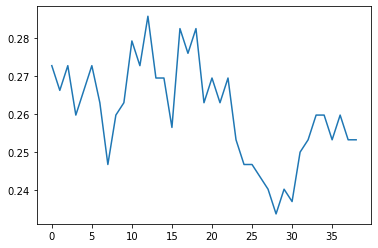

In [22]:
plt.plot(error_rate)

* from the graph the lowest point is roughly around 29. Lets try k=29

In [48]:
knn = KNeighborsClassifier(n_neighbors=29)

In [49]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=29)

In [50]:
predict = knn.predict(X_test)

In [51]:
print(classification_report(y_test,predict))

print(confusion_matrix(y_test,predict))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       202
           1       0.70      0.56      0.62       106

    accuracy                           0.77       308
   macro avg       0.75      0.72      0.73       308
weighted avg       0.76      0.77      0.76       308

[[177  25]
 [ 47  59]]


When K=1 we got an accuracy of 73% , when K=29 we got an accuracy of 77% which far more better than the previous K value.